In [1]:
from fr_model import Fr

from torchsummary import summary


model = Fr()
model.to('cuda')
summary(model=model, input_size=(3, 160,160))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 160, 160]             896
       BatchNorm2d-2         [-1, 32, 160, 160]              64
              ReLU-3         [-1, 32, 160, 160]               0
            Conv2d-4         [-1, 32, 160, 160]          25,632
       BatchNorm2d-5         [-1, 32, 160, 160]              64
              ReLU-6         [-1, 32, 160, 160]               0
            Conv2d-7         [-1, 32, 160, 160]           1,056
       BatchNorm2d-8         [-1, 32, 160, 160]              64
              ReLU-9         [-1, 32, 160, 160]               0
        MaxPool2d-10           [-1, 32, 80, 80]               0
          Fr_conv-11           [-1, 32, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          18,496
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

# 🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟

In [1]:
import os
import torch
from fr_model import Fr
from torchvision import transforms

model = Fr()
chkpt=torch.load('models/fr_iter11.pth.tar')
model.load_state_dict(chkpt['state_dict'])
model.to('cuda')

trf = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.0, 0.0, 0.0], [1.0, 1.0, 1.0]),
        transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1)
    ])

In [2]:
def infrnc(img_path, model, trf, device='cuda'):
    from PIL import Image

    img = trf(Image.open(img_path).convert('RGB'))
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        return model(img)

In [3]:
test_path = "/mnt/c/Users/Krish/Downloads/fr/test_ds/"

op = []
op_label = []

for i in os.listdir(test_path):
    for j in os.listdir(test_path + i):
        op.append(infrnc(img_path=test_path + i + '/' + j, model=model, trf=trf))
        op_label.append(i)

import numpy as np

for i in range(len(op)):
    op[i] = op[i].flatten().to('cpu')
op = np.array(op)
op_label = np.array(op_label)

In [4]:
len(op_label)

15

/home/solo/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


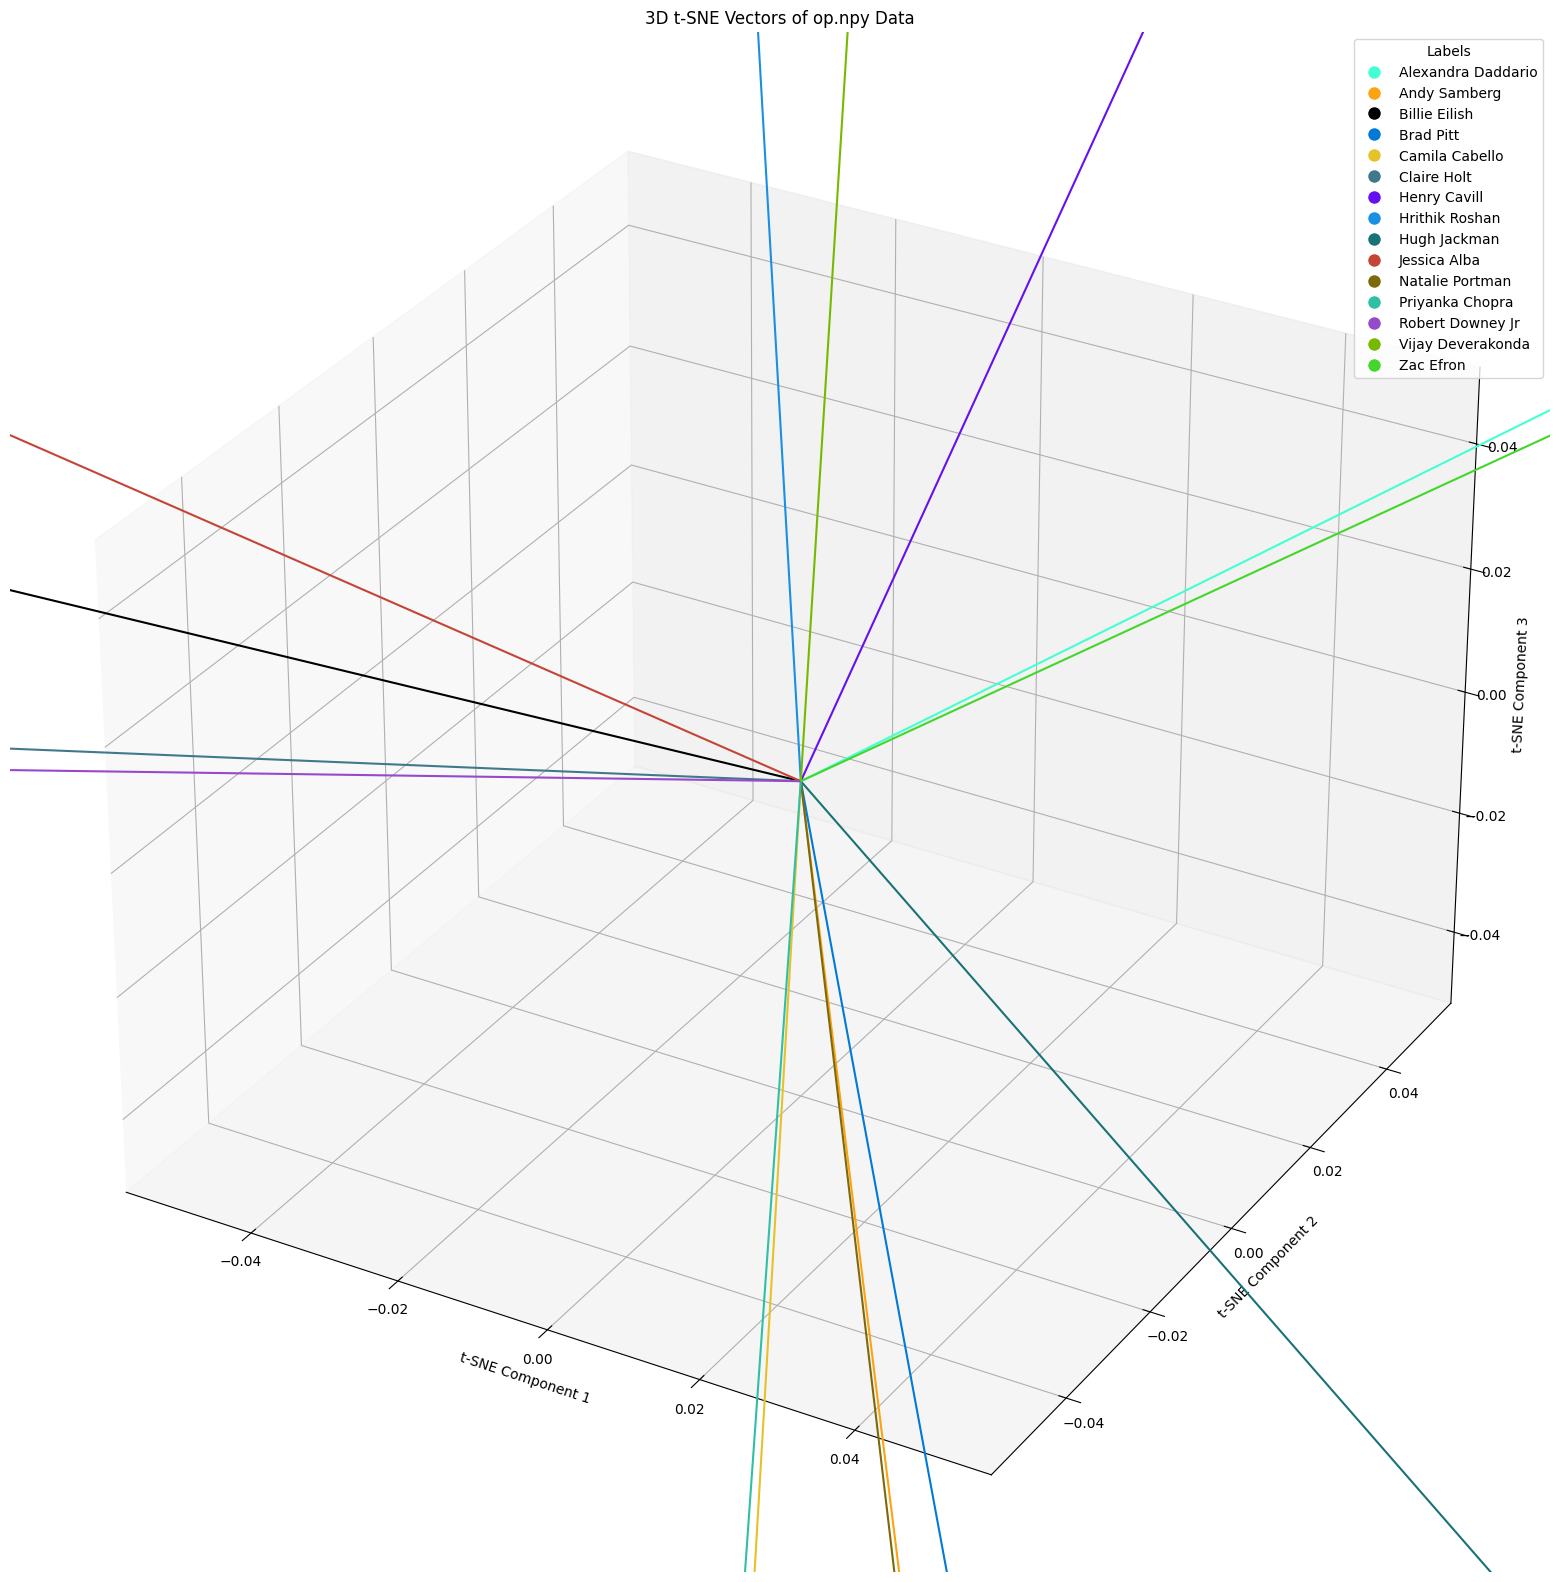

In [15]:
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# colors = ['#000000', '#4D4D4D', '#999999', '#E6E6E6', '#F21414', '#F54F4F', '#F98A89', '#1ED760', '#F78D0F',
#           '#F9A94B', '#FBC687', '#FFFF00', '#FFFF3F', '#FFFF80', '#E9C3E1', '#D386C4', '#BE4AA7',
#           '#A80F89', '#D4C3E0', '#AA87C1', '#7E4CA1', '#531182', '#C1CCDD', '#839ABB', '#446899', '#093477',
#           '#C1D6C1', '#82AD82', '#448444', '#075B06', '#FF12FF']

colors = ['#44FFD2', '#FCA311', '#000000', 
          '#0179D7', '#E6C229', '#40798C', 
          '#6610F2', '#1A8FE3', '#197278',
          '#C44536', '#7C6A0A', '#2EBFA5',
          '#9649CB', '#76B900', '#44D62C'
          ]
col_map = ListedColormap(colors)

# Perform t-SNE
tsne = TSNE(n_components=3, perplexity=10, n_iter=1000, random_state=42)
op_tsne = tsne.fit_transform(op)

# Map unique labels to colors
unique_labels = np.unique(op_label)
label_to_color = {label: col_map(i / len(unique_labels)) for i, label in enumerate(unique_labels)}

# Create 3D plot
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Plot vectors and add labels
for i in range(op_tsne.shape[0]):
    ax.quiver(0, 0, 0, op_tsne[i, 0], op_tsne[i, 1], op_tsne[i, 2],
              color=label_to_color[op_label[i]], arrow_length_ratio=0.1)
    # Add text annotation
    ax.text(op_tsne[i, 0], op_tsne[i, 1], op_tsne[i, 2], op_label[i], fontsize=9)

# Create legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=label_to_color[label], markersize=10, label=label) 
           for label in unique_labels]
ax.legend(handles=handles, title='Labels')

# Set plot titles and labels
ax.set_title('3D t-SNE Vectors of op.npy Data')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

plt.show()


6.
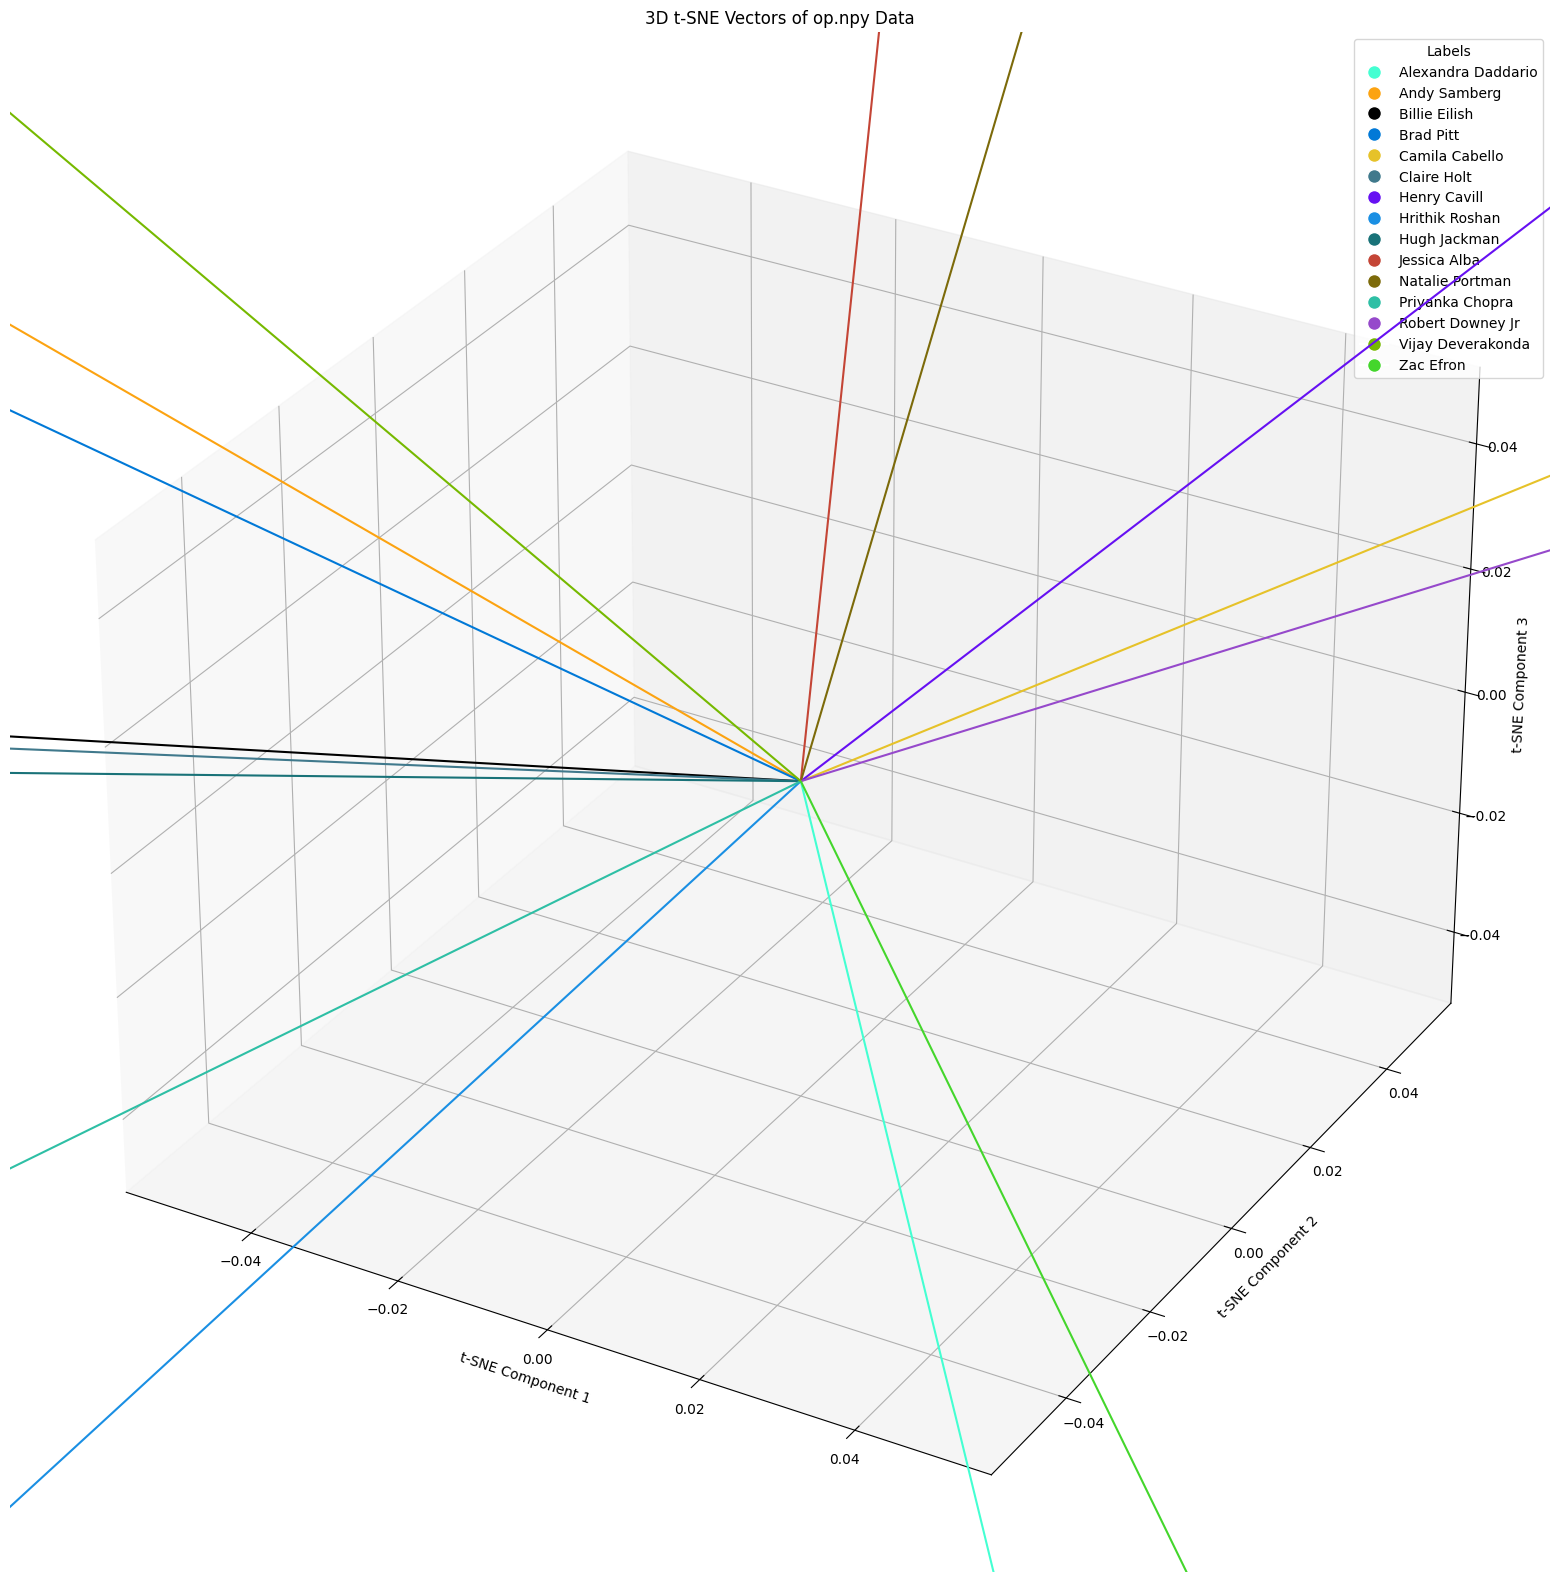

5.
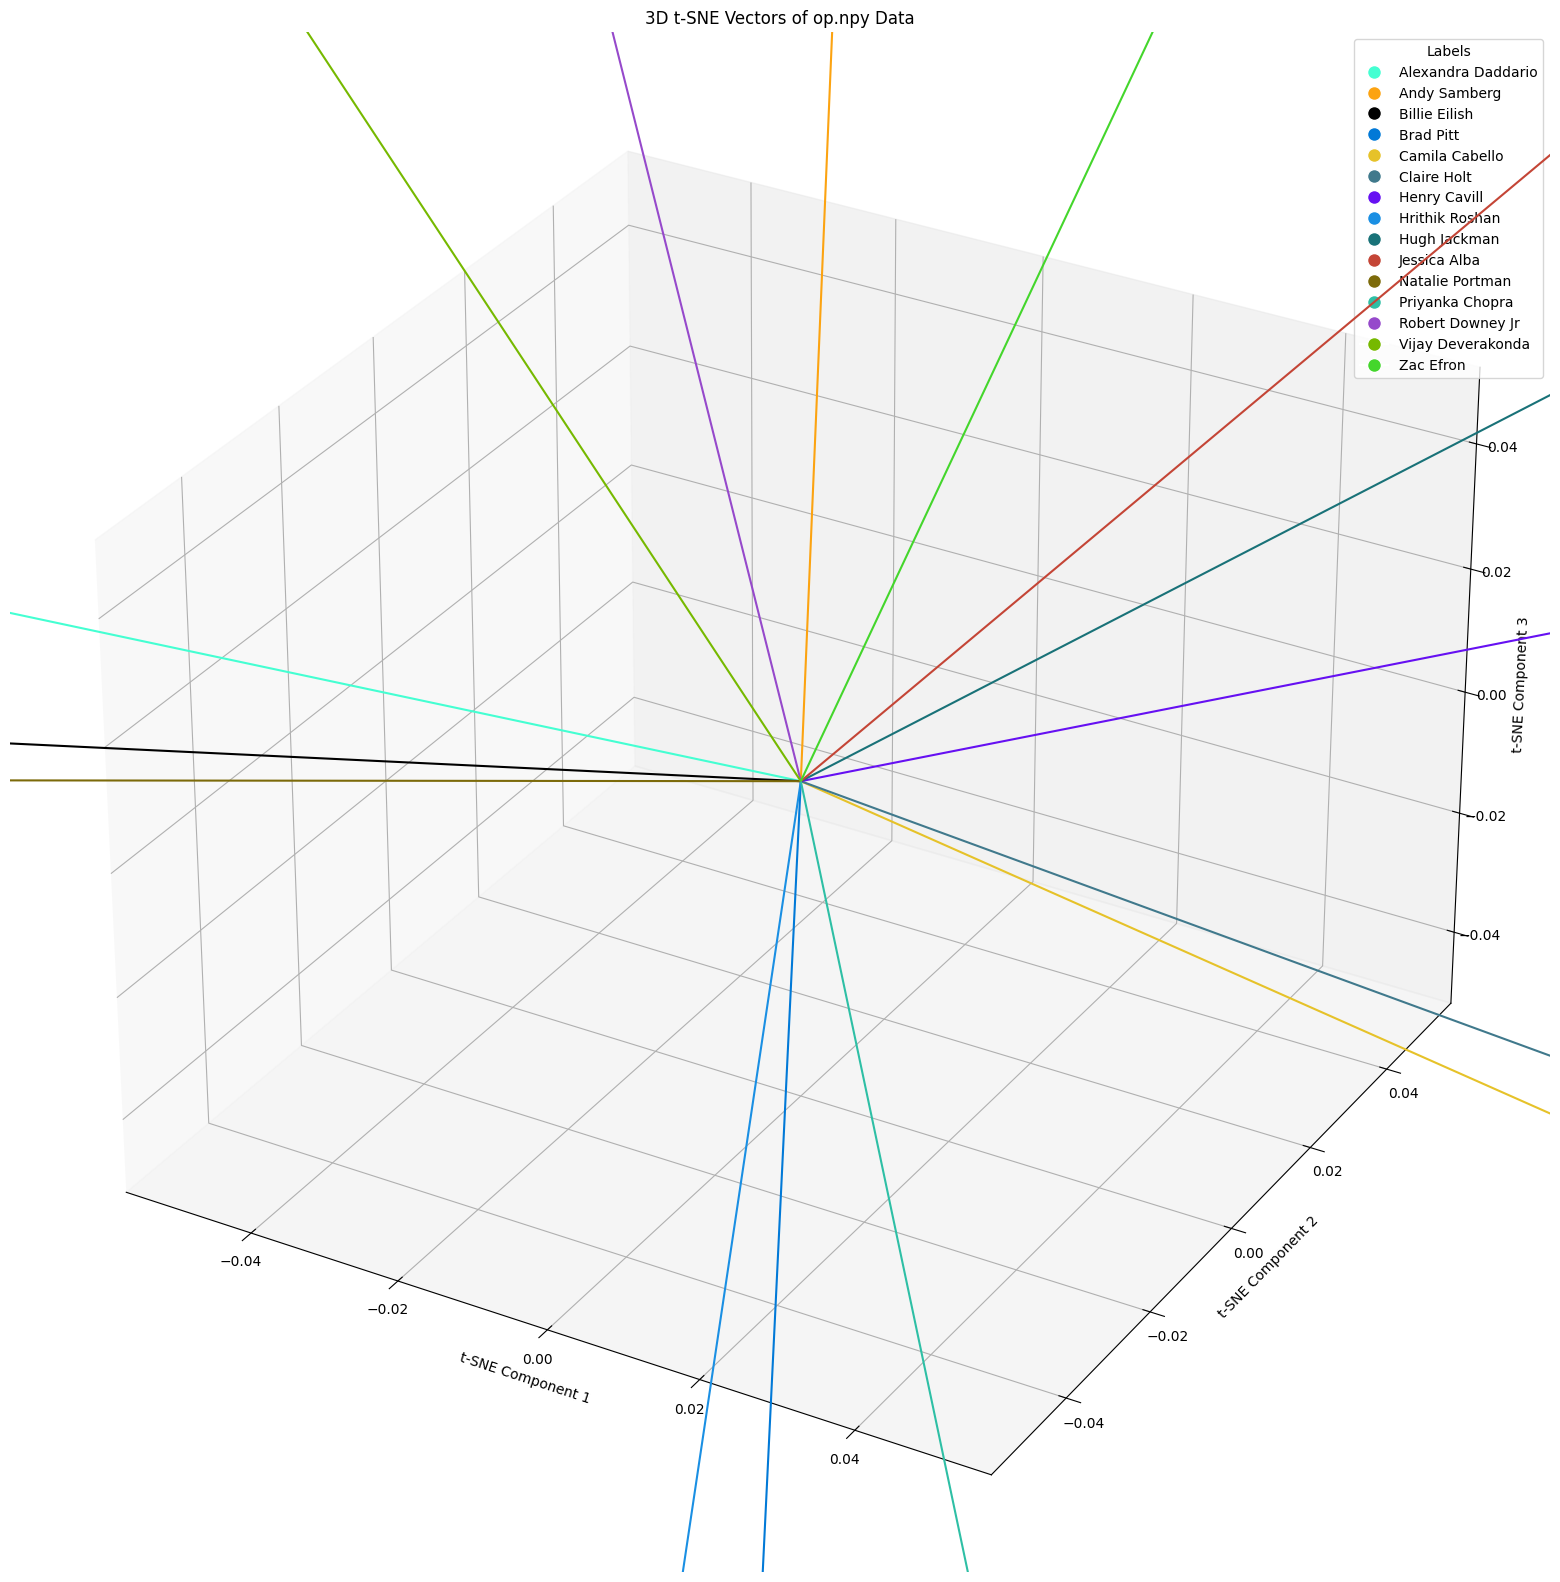

4.
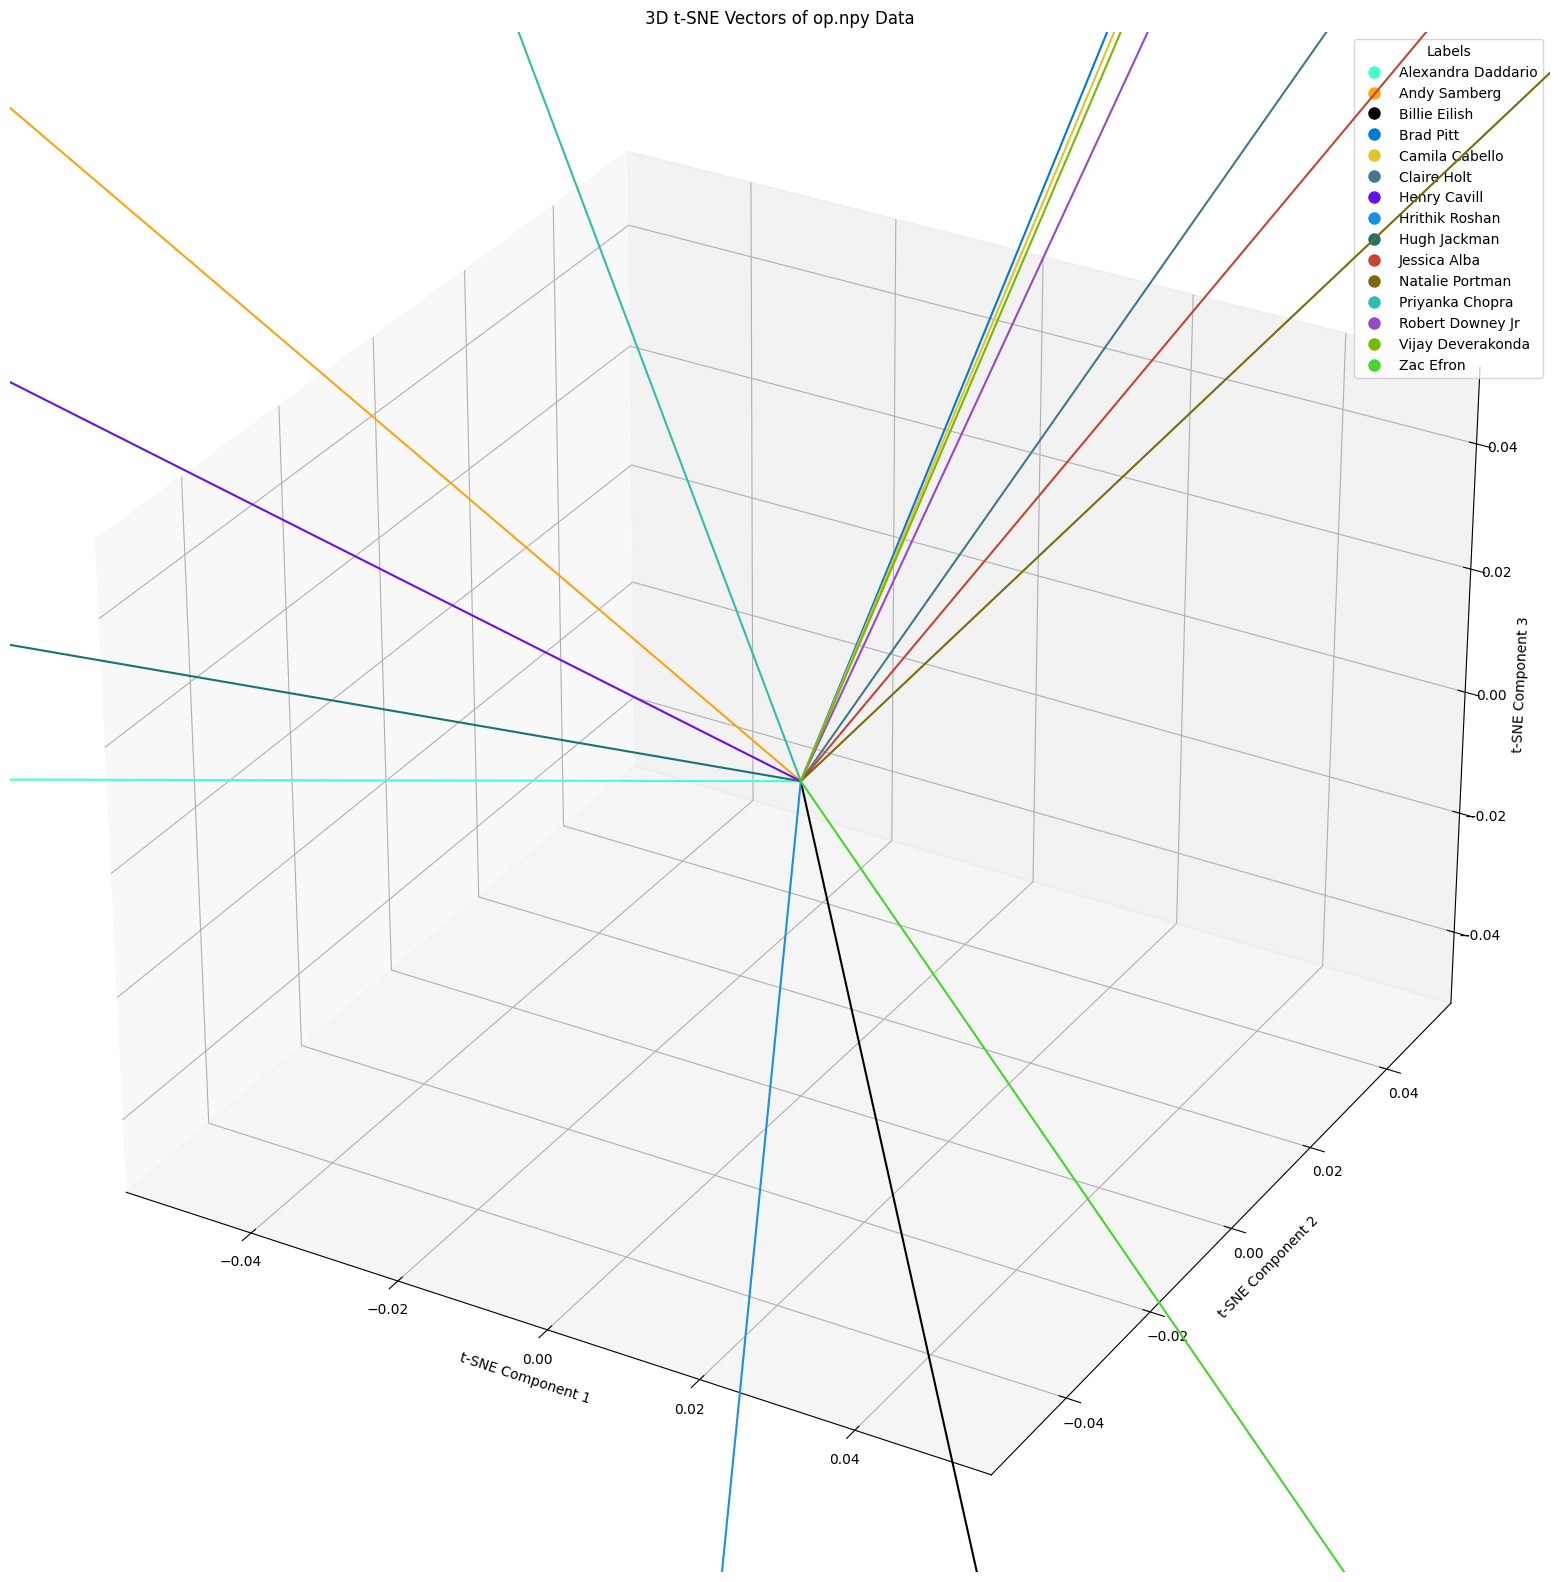

3.
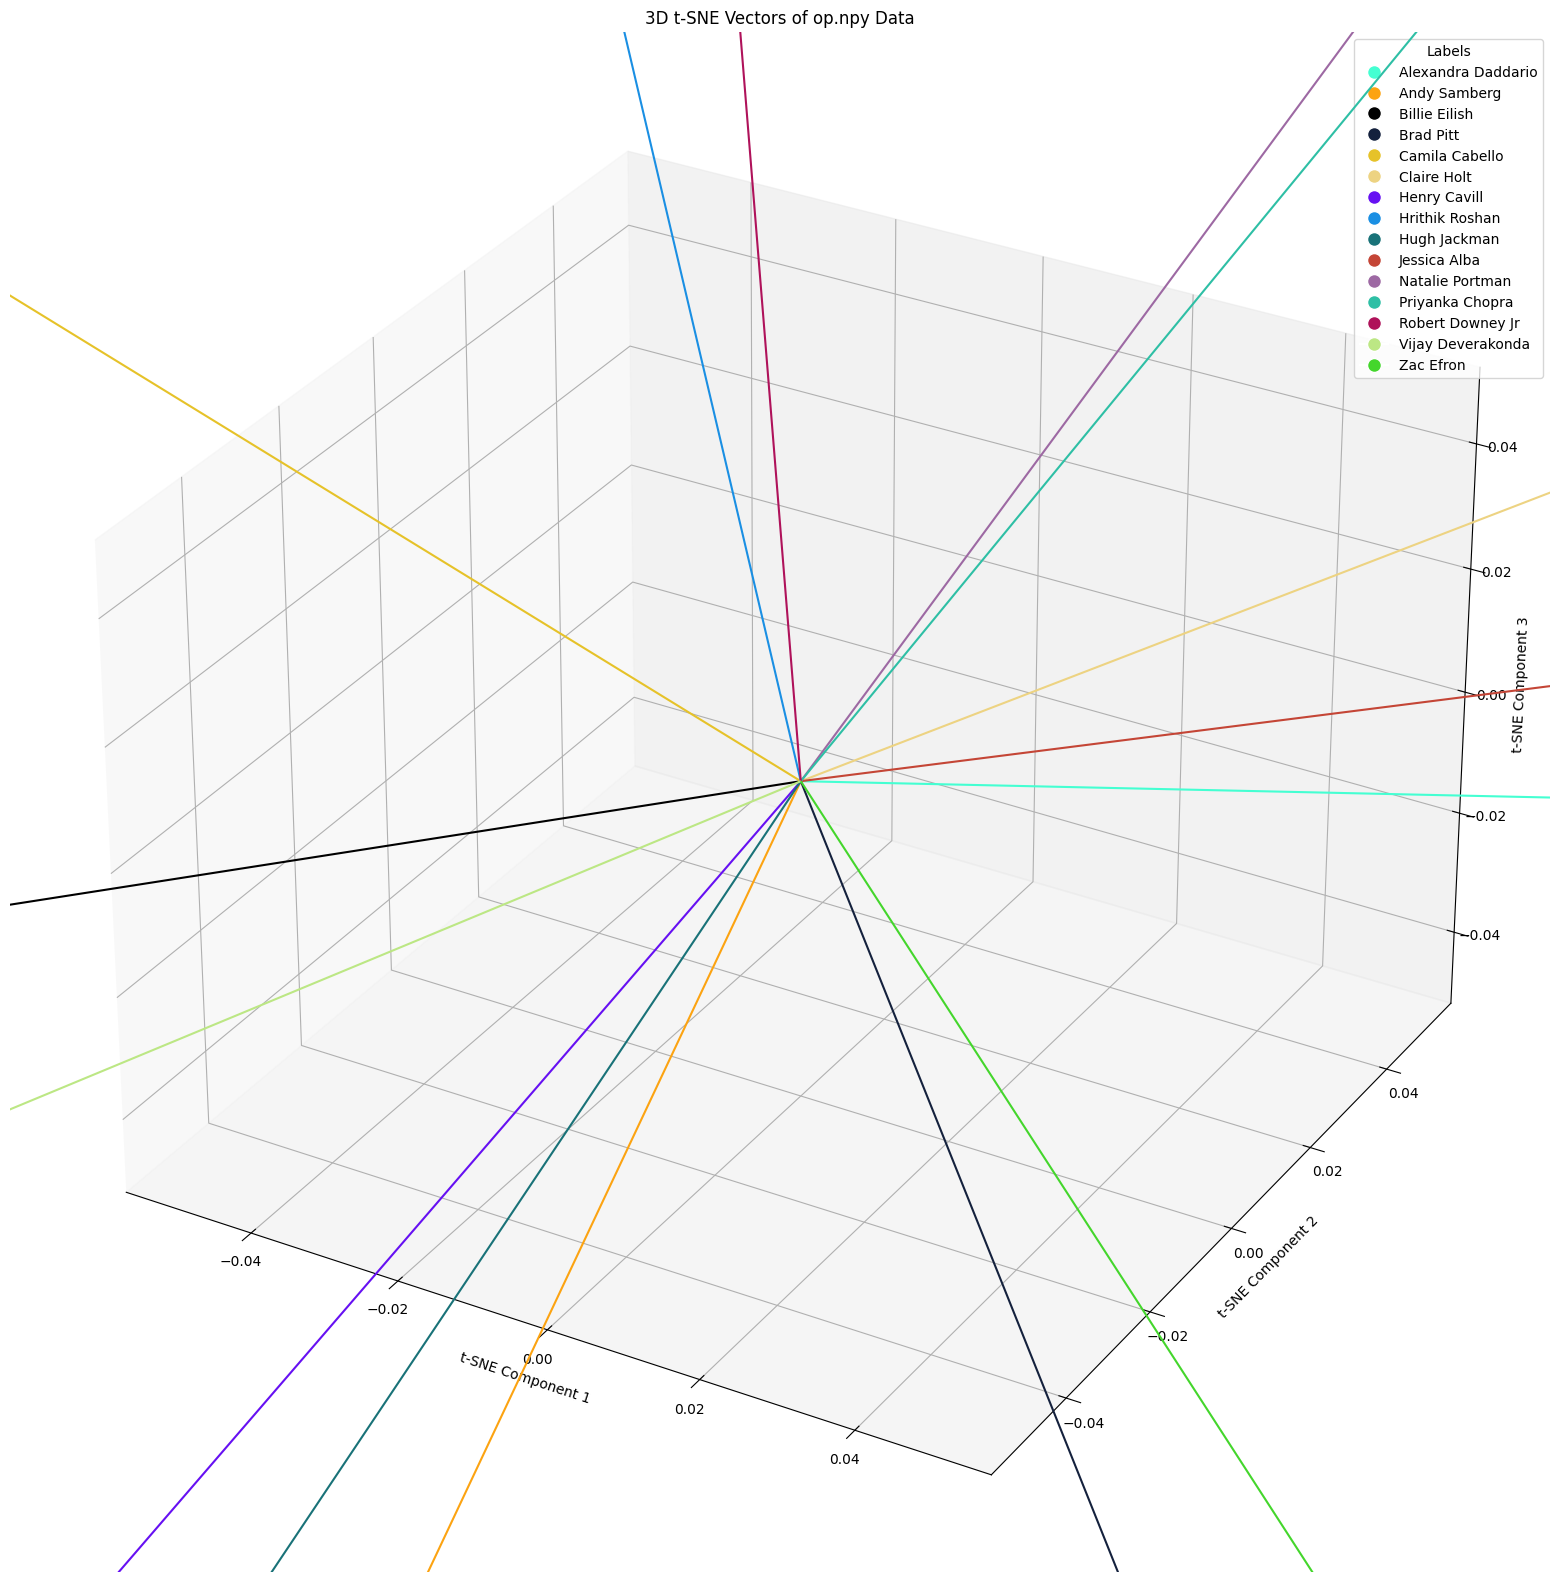

2.
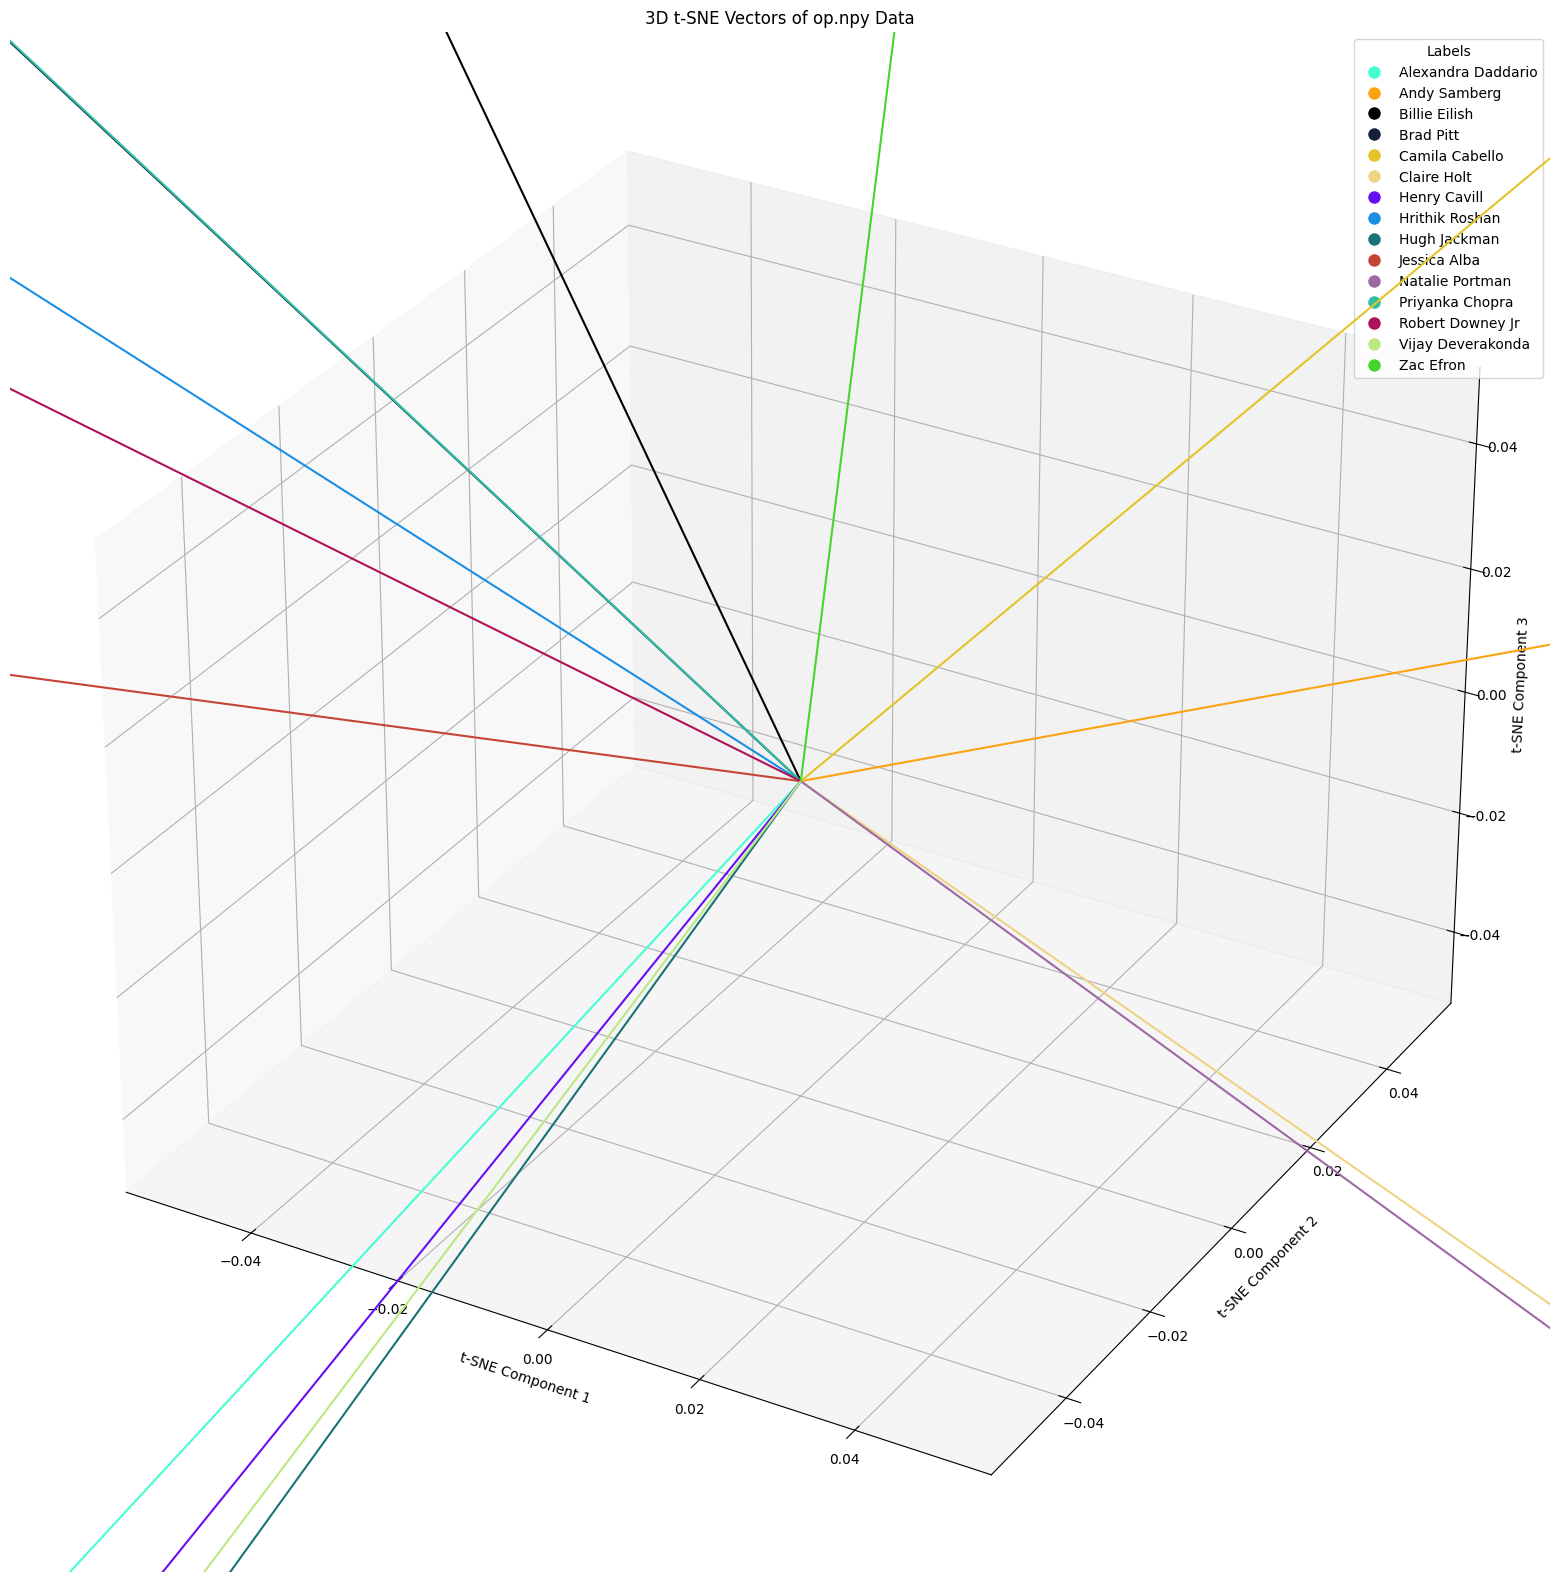

1)
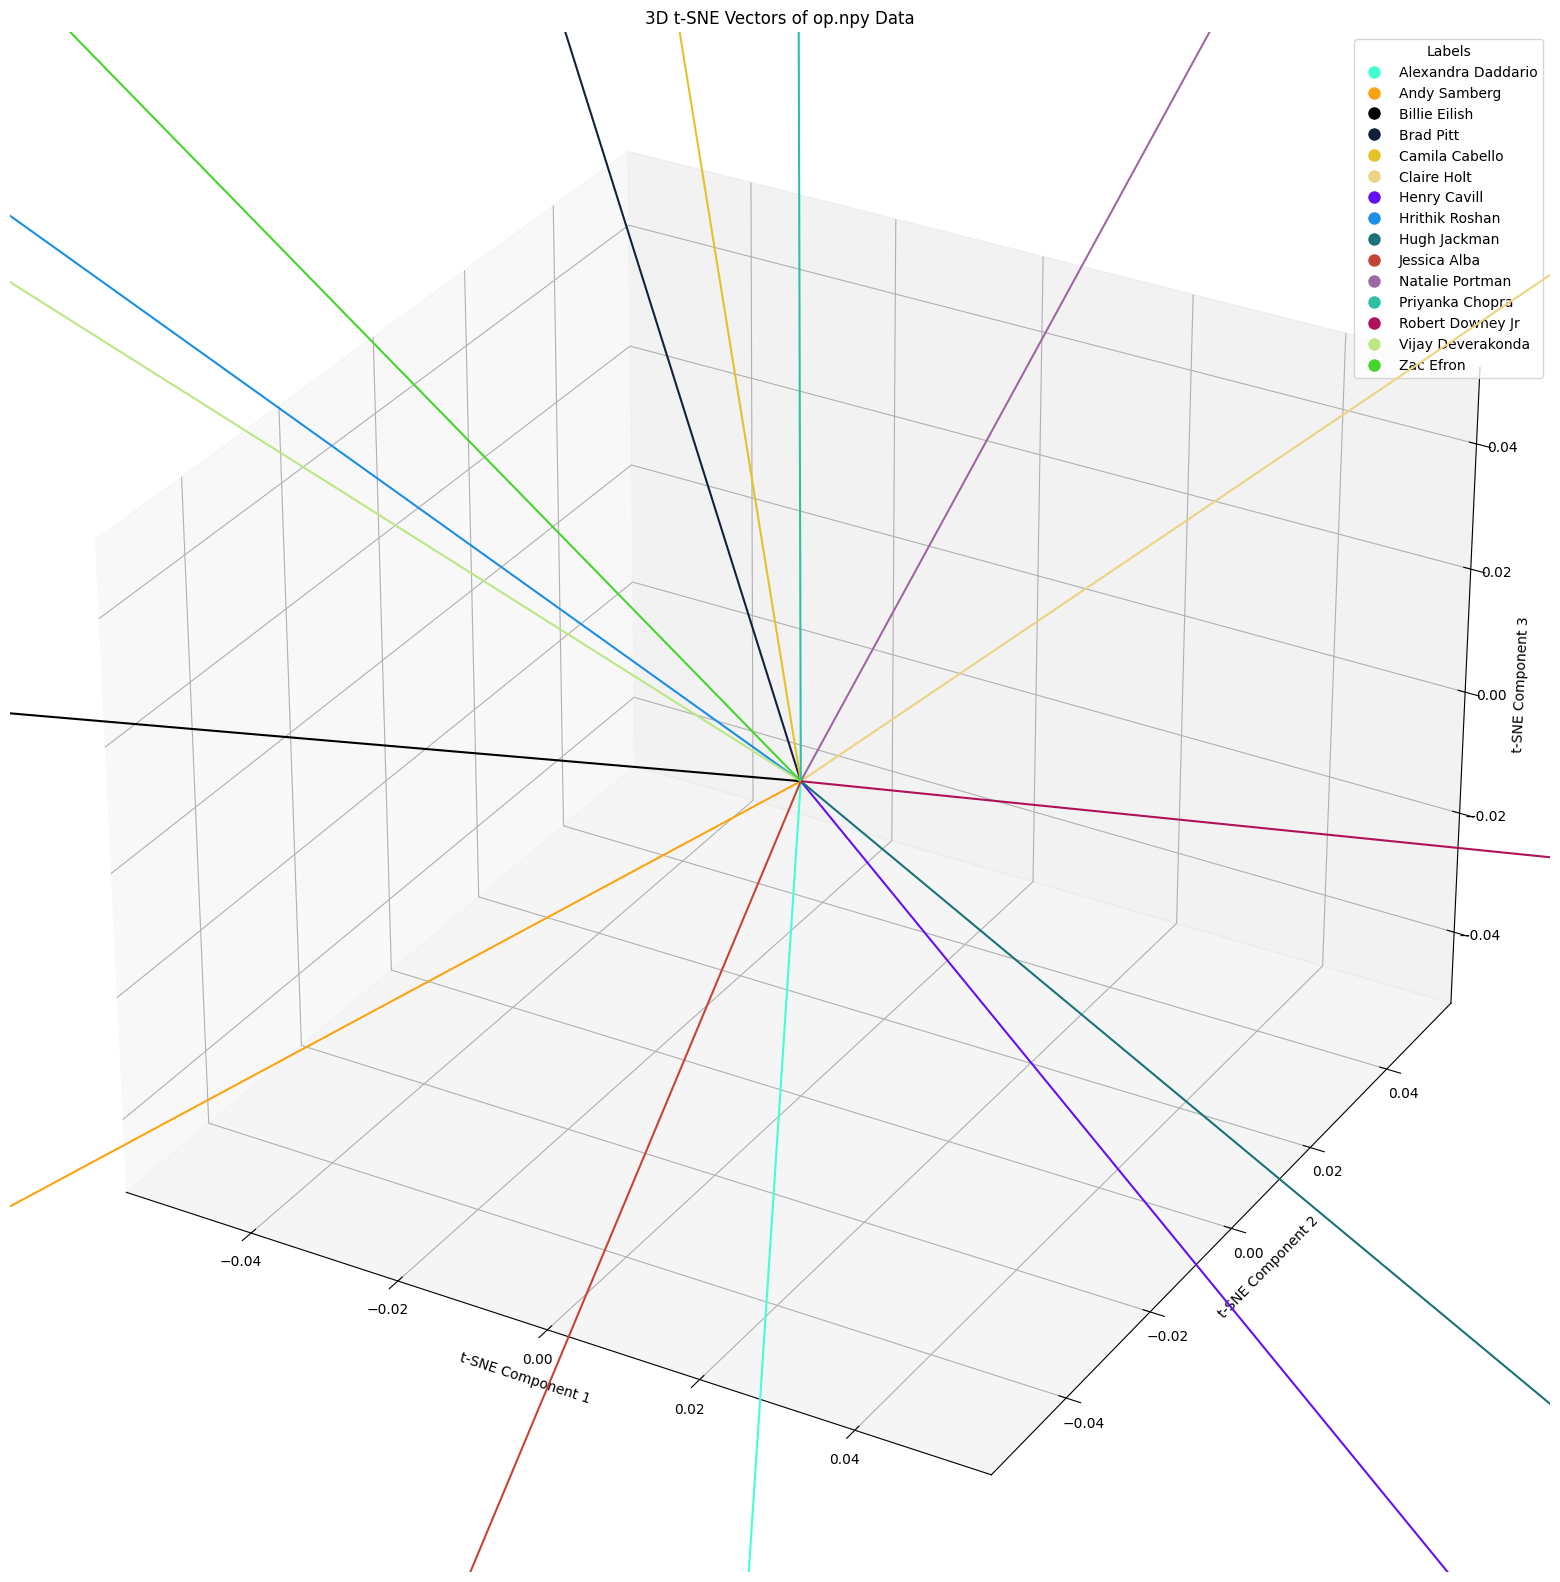

# 🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock

In [6]:
op_label

array(['Alexandra Daddario', 'Andy Samberg', 'Billie Eilish', 'Brad Pitt',
       'Camila Cabello', 'Claire Holt', 'Henry Cavill', 'Hrithik Roshan',
       'Hugh Jackman', 'Jessica Alba', 'Natalie Portman',
       'Priyanka Chopra', 'Robert Downey Jr', 'Vijay Deverakonda',
       'Zac Efron'], dtype='<U18')

In [18]:
img_path = "/mnt/c/Users/Krish/Downloads/sid1.jpeg"
embd = infrnc(img_path=img_path, model=model, trf=trf)
embd = embd.flatten().to('cpu')

sim = []
for i in op:
    sim.append([cosine_similarity([i], [embd])[0][0], euclidean(i, embd), cityblock(i, embd), np.dot(i, embd)])
op_label[np.argmax([i[0] for i in sim])], op_label[np.argmax([i[1] for i in sim])], op_label[np.argmax([i[2] for i in sim])], op_label[np.argmax([i[3] for i in sim])]

('Natalie Portman', 'Alexandra Daddario', 'Andy Samberg', 'Robert Downey Jr')

In [19]:
sim

[[0.862597, 64.46558380126953, 645.951, 12815.184],
 [0.8985671, 59.792503356933594, 685.3016, 15419.4],
 [0.9268173, 56.36244583129883, 619.7017, 17256.268],
 [0.92951304, 46.773704528808594, 513.28467, 14298.352],
 [0.9139651, 51.241363525390625, 539.7493, 13452.949],
 [0.9398198, 48.60025405883789, 472.85114, 16733.047],
 [0.94926167, 40.38677978515625, 497.53235, 13471.706],
 [0.91124535, 52.00816345214844, 539.40735, 13089.65],
 [0.9415092, 44.310829162597656, 519.7312, 15600.148],
 [0.92268777, 55.03268051147461, 593.3093, 16559.13],
 [0.95408595, 44.44276428222656, 528.87604, 17319.13],
 [0.90646774, 55.535037994384766, 596.74744, 14876.34],
 [0.9344927, 62.91759490966797, 643.353, 19111.6],
 [0.91583484, 53.19118118286133, 554.73425, 11503.672],
 [0.8955496, 57.60126495361328, 573.8141, 11339.093]]

In [8]:
root_path = '/mnt/c/Users/Krish/Downloads/fr/train_ds/'
for pth in os.listdir(root_path):
    cnt = 0
    lst = os.listdir(root_path + pth)
    lg = len(lst)
    for j in lst:
        img_path = root_path + pth + '/' + j
        embd = infrnc(img_path=img_path, model=model, trf=trf)
        embd = embd.flatten().to('cpu')
        sim = []

        for i in op:
            sim.append([cosine_similarity([i], [embd])[0][0], euclidean(i, embd), cityblock(i, embd), np.dot(i, embd)])
        temp = op_label[np.argmax([i[0] for i in sim])]
        if temp == pth: cnt += 1
    print(f"{pth}: {cnt}/{lg}, {cnt/lg:.2f}")

Alexandra Daddario: 90/92, 0.98
Andy Samberg: 90/92, 0.98
Billie Eilish: 46/98, 0.47
Brad Pitt: 72/120, 0.60
Camila Cabello: 83/87, 0.95
Claire Holt: 94/96, 0.98
Henry Cavill: 94/106, 0.89
Hrithik Roshan: 82/101, 0.81
Hugh Jackman: 111/112, 0.99
Jessica Alba: 94/108, 0.87
Natalie Portman: 103/105, 0.98
Priyanka Chopra: 96/102, 0.94
Robert Downey Jr: 100/113, 0.88
Vijay Deverakonda: 107/115, 0.93
Zac Efron: 86/91, 0.95


In [13]:
img_path = "/mnt/c/Users/Krish/Downloads/sid2.jpeg"
init_emb = infrnc(img_path=img_path, model=model, trf=trf)
init_emb = init_emb.flatten().to('cpu')

test_img_path = "/mnt/c/Users/Krish/Downloads/sid1.jpeg"
new_embd = infrnc(img_path=img_path, model=model, trf=trf)
new_embd = new_embd.flatten().to('cpu')

cosine_similarity([init_emb], [new_embd])[0][0]

0.9987267